In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")



dataset = pd.read_csv('train.csv', index_col=0, header=[0, 1])
dataset.rename(
    columns={
        'Unnamed: 209_level_1': 'count',
        'Unnamed: 210_level_1': 'price',
    },
    level = 1,
    inplace = True
)


lst_qq = [('bid_price_0',   'mean'),
            ('bid_price_1',   'mean'),
            ('bid_price_2',   'mean'),
            ('bid_price_3',   'mean'),
            ('bid_price_4',   'mean'),

            ('bid_quantity_0',   'mean'),
            ('bid_quantity_1',   'mean'),
            ('bid_quantity_2',   'mean'),
            ('bid_quantity_3',   'mean'),
            ('bid_quantity_4',   'mean'),
          
          
            ('ask_price_0',   'mean'),
            ('ask_price_1',   'mean'),
            ('ask_price_2',   'mean'),
            ('ask_price_3',   'mean'),
            ('ask_price_4',   'mean'),
          
            ('ask_quantity_0',   'mean'),
            ('ask_quantity_1',   'mean'),
            ('ask_quantity_2',   'mean'),
            ('ask_quantity_3',   'mean'),
            ('ask_quantity_4',   'mean'),
          
            ('buy_trade_price',   'mean'),
            ('buy_trade_quantity',   'mean'),
            ('sell_trade_price',   'mean'),
            ('sell_trade_quantity',   'mean'),
          
            (      'count',   'count'),
            (      'price',   'price')]
dataset = dataset[lst_qq]
dataset.columns = dataset.columns.droplevel(1)

dataset

timestamp_second,bid_price_0,bid_price_1,bid_price_2,bid_price_3,bid_price_4,bid_quantity_0,bid_quantity_1,bid_quantity_2,bid_quantity_3,bid_quantity_4,...,ask_quantity_1,ask_quantity_2,ask_quantity_3,ask_quantity_4,buy_trade_price,buy_trade_quantity,sell_trade_price,sell_trade_quantity,count,price
0,44.183379,44.179379,44.176848,44.171273,44.166621,392.131818,218.139394,317.690909,248.210606,259.734848,...,60.293939,116.906061,130.386364,185.569697,44.213,30.5,NaN,NaN,66,44.2005
1,44.190000,44.188000,44.186000,44.173000,44.172000,5.900000,30.500000,60.300000,30.500000,43.200000,...,64.869231,86.415385,101.038462,48.946154,NaN,NaN,NaN,NaN,13,44.2195
2,44.187467,44.179600,44.166333,44.148400,44.141200,39.833333,36.460000,56.633333,1350.233333,309.686667,...,63.200000,155.000000,21.960000,33.980000,NaN,NaN,NaN,NaN,15,44.2195
3,44.181038,44.172558,44.160019,44.143077,44.130135,39.669231,58.419231,102.228846,723.184615,576.711538,...,46.775000,100.219231,96.850000,72.786538,44.226,30.9,NaN,NaN,52,44.2175
4,44.213095,44.187810,44.186429,44.180571,44.163714,302.419048,25.814286,72.071429,297.490476,61.119048,...,46.009524,89.509524,127.733333,91.847619,NaN,NaN,NaN,NaN,21,44.2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,30.777000,30.773636,30.764500,30.758636,30.731182,60.000000,252.295455,160.609091,92.472727,264.854545,...,90.500000,220.290909,159.936364,198.700000,NaN,NaN,NaN,NaN,22,30.7995
1299996,30.777000,30.766000,30.749353,30.738706,30.728824,60.000000,90.500000,162.764706,203.670588,474.341176,...,90.500000,54.447059,247.141176,348.294118,NaN,NaN,NaN,NaN,17,30.7995
1299997,30.780052,30.776224,30.770828,30.762569,30.753741,141.358621,161.934483,183.555172,138.617241,224.144828,...,59.443103,103.927586,169.451724,229.570690,NaN,NaN,NaN,NaN,58,30.7995
1299998,30.786015,30.784552,30.783060,30.780970,30.774149,133.170149,114.765672,132.517910,118.888060,171.332836,...,77.994030,152.771642,195.576119,300.447761,NaN,NaN,NaN,NaN,67,30.8120


In [3]:
dataset_test = dataset.tail(160000)
dataset_test

timestamp_second,bid_price_0,bid_price_1,bid_price_2,bid_price_3,bid_price_4,bid_quantity_0,bid_quantity_1,bid_quantity_2,bid_quantity_3,bid_quantity_4,...,ask_quantity_1,ask_quantity_2,ask_quantity_3,ask_quantity_4,buy_trade_price,buy_trade_quantity,sell_trade_price,sell_trade_quantity,count,price
1140000,32.500000,32.499000,32.495000,32.494000,32.493000,47.000000,245.500000,129.400000,276.700000,35.600000,...,90.500000,83.100000,137.420000,535.960000,NaN,NaN,NaN,NaN,5,32.5200
1140001,32.501094,32.499969,32.497062,32.495656,32.494094,400.100000,908.293750,541.603125,201.181250,253.234375,...,114.409375,217.259375,114.503125,430.821875,NaN,NaN,NaN,NaN,32,32.5200
1140002,32.506030,32.504788,32.503545,32.502212,32.500576,335.603030,700.072727,591.827273,1042.142424,1367.909091,...,113.024242,207.996970,50.048485,278.345455,NaN,NaN,NaN,NaN,33,32.5265
1140003,32.509000,32.507000,32.506000,32.504333,32.502333,129.400000,35.600000,149.100000,1304.466667,2237.666667,...,146.250000,177.350000,180.450000,143.650000,NaN,NaN,NaN,NaN,6,32.5315
1140004,32.515120,32.512440,32.509760,32.507800,32.501493,148.649333,471.412000,918.113333,952.176000,951.261333,...,120.824000,112.132000,240.984000,884.480000,NaN,NaN,NaN,NaN,75,32.5315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,30.777000,30.773636,30.764500,30.758636,30.731182,60.000000,252.295455,160.609091,92.472727,264.854545,...,90.500000,220.290909,159.936364,198.700000,NaN,NaN,NaN,NaN,22,30.7995
1299996,30.777000,30.766000,30.749353,30.738706,30.728824,60.000000,90.500000,162.764706,203.670588,474.341176,...,90.500000,54.447059,247.141176,348.294118,NaN,NaN,NaN,NaN,17,30.7995
1299997,30.780052,30.776224,30.770828,30.762569,30.753741,141.358621,161.934483,183.555172,138.617241,224.144828,...,59.443103,103.927586,169.451724,229.570690,NaN,NaN,NaN,NaN,58,30.7995
1299998,30.786015,30.784552,30.783060,30.780970,30.774149,133.170149,114.765672,132.517910,118.888060,171.332836,...,77.994030,152.771642,195.576119,300.447761,NaN,NaN,NaN,NaN,67,30.8120


In [4]:
dataset = dataset[0:1140000]
dataset

timestamp_second,bid_price_0,bid_price_1,bid_price_2,bid_price_3,bid_price_4,bid_quantity_0,bid_quantity_1,bid_quantity_2,bid_quantity_3,bid_quantity_4,...,ask_quantity_1,ask_quantity_2,ask_quantity_3,ask_quantity_4,buy_trade_price,buy_trade_quantity,sell_trade_price,sell_trade_quantity,count,price
0,44.183379,44.179379,44.176848,44.171273,44.166621,392.131818,218.139394,317.690909,248.210606,259.734848,...,60.293939,116.906061,130.386364,185.569697,44.213,30.5,NaN,NaN,66,44.2005
1,44.190000,44.188000,44.186000,44.173000,44.172000,5.900000,30.500000,60.300000,30.500000,43.200000,...,64.869231,86.415385,101.038462,48.946154,NaN,NaN,NaN,NaN,13,44.2195
2,44.187467,44.179600,44.166333,44.148400,44.141200,39.833333,36.460000,56.633333,1350.233333,309.686667,...,63.200000,155.000000,21.960000,33.980000,NaN,NaN,NaN,NaN,15,44.2195
3,44.181038,44.172558,44.160019,44.143077,44.130135,39.669231,58.419231,102.228846,723.184615,576.711538,...,46.775000,100.219231,96.850000,72.786538,44.226,30.9,NaN,NaN,52,44.2175
4,44.213095,44.187810,44.186429,44.180571,44.163714,302.419048,25.814286,72.071429,297.490476,61.119048,...,46.009524,89.509524,127.733333,91.847619,NaN,NaN,NaN,NaN,21,44.2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139995,32.511154,32.510154,32.506538,32.504846,32.502538,12.861538,166.869231,91.546154,502.984615,2522.200000,...,140.653846,71.069231,217.407692,83.638462,NaN,NaN,NaN,NaN,13,32.5310
1139996,32.512800,32.511600,32.509000,32.504600,32.502400,14.280000,76.820000,222.460000,783.120000,2263.880000,...,161.400000,47.000000,245.500000,66.600000,NaN,NaN,NaN,NaN,5,32.5305
1139997,32.498881,32.494733,32.491525,32.489663,32.485030,277.960396,163.263366,325.948515,513.191089,1125.927723,...,185.693069,141.602970,128.697030,249.178218,NaN,NaN,NaN,NaN,101,32.5310
1139998,32.490720,32.489700,32.487700,32.484420,32.482400,65.678000,96.482000,162.780000,221.878000,891.558000,...,97.710000,145.052000,103.806000,160.166000,NaN,NaN,NaN,NaN,50,32.5140


In [5]:
def get_dict_row(part_data):
    dsts_lst = {}
    for i in range(5):

        dsts_lst['bid_price' + str(i) + '_weighted'] = ((part_data["bid_price_" + str(i)]  *
                         part_data["bid_quantity_" + str(i)]).sum(axis=0)  / 
                         part_data["bid_quantity_" + str(i)].sum(axis=0))

        dsts_lst['ask_price' + str(i) + '_weighted'] = ((part_data["ask_price_" + str(i)]  *
                         part_data["ask_quantity_" + str(i)]).sum(axis=0)  / 
                         part_data["ask_quantity_" + str(i)].sum(axis=0))
        
        dsts_lst["ask_quantity_" + str(i)] = part_data["ask_quantity_" + str(i)].sum(axis=0)
        dsts_lst["bid_quantity_" + str(i)] = part_data["bid_quantity_" + str(i)].sum(axis=0)



    dsts_lst['buy_trade_price'] = (part_data.buy_trade_price * part_data.buy_trade_quantity).sum(axis=0) /  part_data.buy_trade_quantity.sum(axis=0)
    dsts_lst['buy_trade_quantity'] = (part_data.buy_trade_quantity.sum(axis=0))

    dsts_lst['sell_trade_price'] = ((part_data.sell_trade_price * part_data.sell_trade_quantity).sum(axis=0) /  part_data.sell_trade_quantity.sum(axis=0))
    dsts_lst['sell_trade_quantity'] = (part_data.sell_trade_quantity.sum(axis=0))


    dsts_lst['count'] = (part_data['count'].sum(axis=0))
    dsts_lst['price'] = part_data['price'].mean()
    
    return dsts_lst



In [6]:
def precess_1000(data):
    df = data[0:40]
    min_data_2 = pd.DataFrame(get_dict_row(df), index=[0])
    i = 0
    while df.empty == False:
        df = data[40 + i*60 : 40 + (i+1)*60]
        if df.empty == False:
            min_data_2 = min_data_2.append(get_dict_row(df), ignore_index=True)  
        i+=1
    last_sec_price = data.iloc[-1].price 
    
    return min_data_2 , last_sec_price 



In [7]:
def get_features_and_last_sec_price(df , last_sec_price):
    feachers = {}

    price_bid =   (df.iloc[-1]['bid_price0_weighted'] * df.iloc[-1]['bid_quantity_0'] +
                   df.iloc[-1]['bid_price1_weighted'] * df.iloc[-1]['bid_quantity_1'] +
                   df.iloc[-1]['bid_price2_weighted'] * df.iloc[-1]['bid_quantity_2'] +    
                   df.iloc[-1]['bid_price3_weighted'] * df.iloc[-1]['bid_quantity_3'] +        
                   df.iloc[-1]['bid_price4_weighted'] * df.iloc[-1]['bid_quantity_4'])/(
                   df.iloc[-1]['bid_quantity_0'] + df.iloc[-1]['bid_quantity_1'] +
                   df.iloc[-1]['bid_quantity_2'] + df.iloc[-1]['bid_quantity_3'] +
                   df.iloc[-1]['bid_quantity_4'])

    price_ask =   (df.iloc[-1]['ask_price0_weighted'] * df.iloc[-1]['ask_quantity_0'] +
                   df.iloc[-1]['ask_price1_weighted'] * df.iloc[-1]['ask_quantity_1'] +
                   df.iloc[-1]['ask_price2_weighted'] * df.iloc[-1]['ask_quantity_2'] +    
                   df.iloc[-1]['ask_price3_weighted'] * df.iloc[-1]['ask_quantity_3'] +        
                   df.iloc[-1]['ask_price4_weighted'] * df.iloc[-1]['ask_quantity_4'])/(
                   df.iloc[-1]['ask_quantity_0'] + df.iloc[-1]['ask_quantity_1'] +
                   df.iloc[-1]['ask_quantity_2'] + df.iloc[-1]['ask_quantity_3'] +
                   df.iloc[-1]['ask_quantity_4'])

    
    feachers['bias'] = 1
    feachers['delta_price_3day'] = df.price.iloc[-1] - df.price.iloc[-3]
    feachers['std_price'] = df.price.std()
    feachers['sell_trade_quantity'] = df.sell_trade_quantity.sum()
    feachers['buy_trade_quantity'] = df.buy_trade_quantity.sum()
    feachers['count'] = df['count'].sum()
    feachers['last_min_spread'] = price_ask - price_bid
    feachers['last_sec_price'] = last_sec_price
    feachers['bid_1_2_last_5min'] = (df.tail(5)['bid_quantity_0'] + df.tail(5)['bid_quantity_1']).sum()
    feachers['ask_1_2_last_5min'] = (df.tail(5)['ask_quantity_0'] + df.tail(5)['ask_quantity_1']).sum()

    return feachers

In [8]:
def get_X_y_row(data_1060):
    
    df , last_sec_price  = precess_1000(data_1060[0:1000])
    X = get_features_and_last_sec_price(df , last_sec_price)
    y = data_1060.price.iloc[-1]
    
    res_df = pd.DataFrame(X, index=[0])
    res_df['price_to_predict'] = y

    return res_df
        

In [9]:
def norm_X(X):
    return (X-X.mean ())/X.std()

In [10]:
dataset.shape[0]//1600

712

In [11]:
def data_processing(dataset):
    df = pd.DataFrame()
    a = (dataset[i*1060 : (i+1)*1060] for i in range(dataset.shape[0]//1600))
    
    for data_1060 in a:
            df = df.append(get_X_y_row(data_1060))
            
    return df

In [12]:
df_to_train = data_processing(dataset)

In [13]:
df_to_train

,bias,delta_price_3day,std_price,sell_trade_quantity,buy_trade_quantity,count,last_min_spread,last_sec_price,bid_1_2_last_5min,ask_1_2_last_5min,price_to_predict
0,1,0.065167,0.088575,1282.354167,481.350000,18963.0,0.071968,44.1420,125613.117996,32270.948064,44.0685
0,1,-0.037292,0.055649,295.353571,762.566667,13846.0,0.071419,43.9615,50732.356880,29592.662828,43.9420
0,1,-0.050508,0.061802,96.100000,477.875000,15597.0,0.060322,43.9260,31544.088793,37176.618809,43.9170
0,1,0.014767,0.104349,77.300000,455.003333,18311.0,0.050968,44.1345,40769.428466,87288.599522,44.1765
0,1,0.002683,0.366859,1533.725000,2018.272794,25165.0,0.056639,43.3640,416983.224386,403173.225908,43.2920
...,...,...,...,...,...,...,...,...,...,...,...
0,1,-0.004258,0.055633,364.100000,215.709524,18881.0,0.046691,39.1195,120563.274284,322082.212651,39.0975
0,1,0.057858,0.071326,116.533333,130.800000,18861.0,0.048404,39.3355,141311.824971,202310.206587,39.3340
0,1,-0.107242,0.123567,783.196992,1240.928571,22953.0,0.058050,38.8510,240970.482764,406386.319867,38.7740
0,1,0.022558,0.141257,3650.438676,6108.688045,66078.0,0.058175,38.0290,240789.176028,136277.518114,37.9530


In [14]:
X = df_to_train.drop("price_to_predict", axis='columns')
#X = norm_X(X)

y = df_to_train.price_to_predict


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import math



model = LinearRegression().fit(X.values, y)
coef_sklearn = model.coef_.T
coef_sklearn[0] = model.intercept_
print(f'Коэффициенты рассчитанные с использованием библиотеки sklearn {coef_sklearn.T}')

Коэффициенты рассчитанные с использованием библиотеки sklearn [ 4.43017155e-03 -1.19259988e-01 -1.07687604e-01  7.94931656e-06
 -5.63013587e-06  3.62791172e-07 -4.02398815e-01  1.00035694e+00
  2.79510198e-08  2.35552124e-09]


In [16]:
y_pred = X.dot(coef_sklearn)
y_pred

0    44.133867
0    43.955903
0    43.925905
0    44.127217
0    43.343854
       ...    
0    39.126280
0    39.331371
0    38.860681
0    38.031343
0    38.034891
Length: 712, dtype: float64

In [17]:
y

0    44.0685
0    43.9420
0    43.9170
0    44.1765
0    43.2920
      ...   
0    39.0975
0    39.3340
0    38.7740
0    37.9530
0    37.9910
Name: price_to_predict, Length: 712, dtype: float64

In [18]:
MSE = mean_squared_error(y, y_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.06990520879337107


# Fitting на обучении

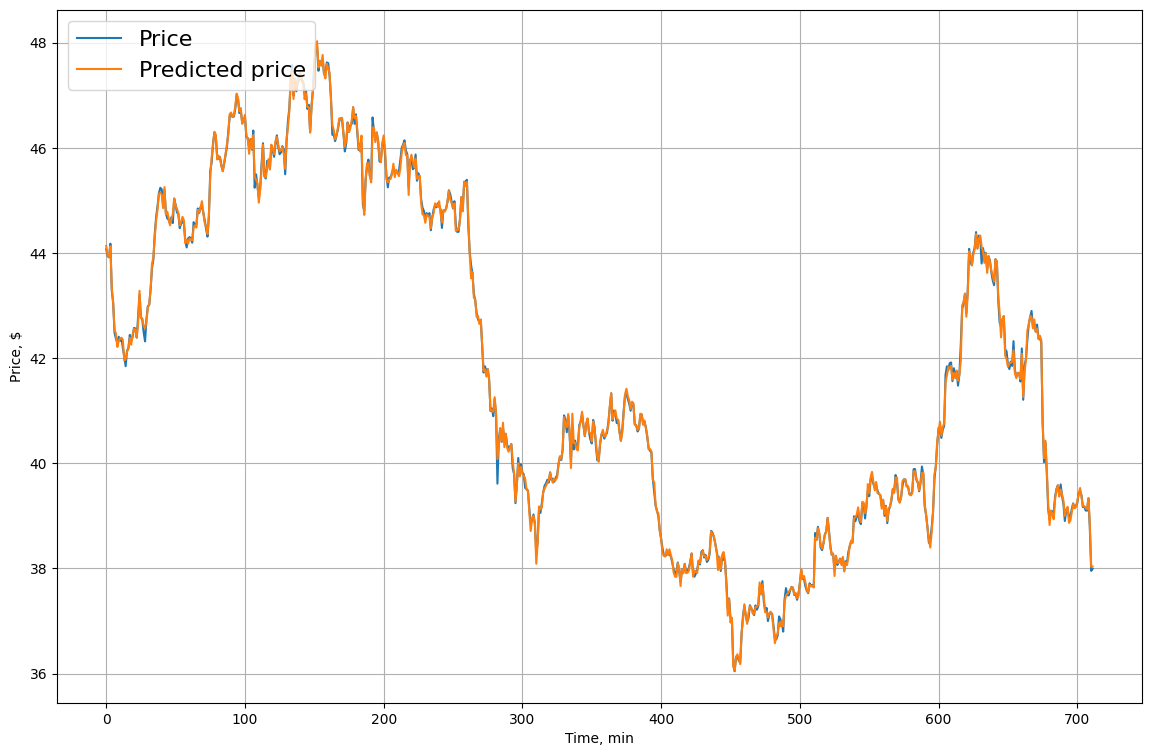

In [19]:
plt.figure(figsize=(14, 9))
plt.grid()
plt.plot(y.values, label="Price")
plt.plot(y_pred.values, label="Predicted price")

plt.xlabel("Time, min")
plt.ylabel("Price, $")
plt.legend(loc="upper left",fontsize=16)



# Test

In [20]:
dataset_test

timestamp_second,bid_price_0,bid_price_1,bid_price_2,bid_price_3,bid_price_4,bid_quantity_0,bid_quantity_1,bid_quantity_2,bid_quantity_3,bid_quantity_4,...,ask_quantity_1,ask_quantity_2,ask_quantity_3,ask_quantity_4,buy_trade_price,buy_trade_quantity,sell_trade_price,sell_trade_quantity,count,price
1140000,32.500000,32.499000,32.495000,32.494000,32.493000,47.000000,245.500000,129.400000,276.700000,35.600000,...,90.500000,83.100000,137.420000,535.960000,NaN,NaN,NaN,NaN,5,32.5200
1140001,32.501094,32.499969,32.497062,32.495656,32.494094,400.100000,908.293750,541.603125,201.181250,253.234375,...,114.409375,217.259375,114.503125,430.821875,NaN,NaN,NaN,NaN,32,32.5200
1140002,32.506030,32.504788,32.503545,32.502212,32.500576,335.603030,700.072727,591.827273,1042.142424,1367.909091,...,113.024242,207.996970,50.048485,278.345455,NaN,NaN,NaN,NaN,33,32.5265
1140003,32.509000,32.507000,32.506000,32.504333,32.502333,129.400000,35.600000,149.100000,1304.466667,2237.666667,...,146.250000,177.350000,180.450000,143.650000,NaN,NaN,NaN,NaN,6,32.5315
1140004,32.515120,32.512440,32.509760,32.507800,32.501493,148.649333,471.412000,918.113333,952.176000,951.261333,...,120.824000,112.132000,240.984000,884.480000,NaN,NaN,NaN,NaN,75,32.5315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,30.777000,30.773636,30.764500,30.758636,30.731182,60.000000,252.295455,160.609091,92.472727,264.854545,...,90.500000,220.290909,159.936364,198.700000,NaN,NaN,NaN,NaN,22,30.7995
1299996,30.777000,30.766000,30.749353,30.738706,30.728824,60.000000,90.500000,162.764706,203.670588,474.341176,...,90.500000,54.447059,247.141176,348.294118,NaN,NaN,NaN,NaN,17,30.7995
1299997,30.780052,30.776224,30.770828,30.762569,30.753741,141.358621,161.934483,183.555172,138.617241,224.144828,...,59.443103,103.927586,169.451724,229.570690,NaN,NaN,NaN,NaN,58,30.7995
1299998,30.786015,30.784552,30.783060,30.780970,30.774149,133.170149,114.765672,132.517910,118.888060,171.332836,...,77.994030,152.771642,195.576119,300.447761,NaN,NaN,NaN,NaN,67,30.8120


In [21]:
df_to_test = data_processing(dataset_test)
df_to_test

,bias,delta_price_3day,std_price,sell_trade_quantity,buy_trade_quantity,count,last_min_spread,last_sec_price,bid_1_2_last_5min,ask_1_2_last_5min,price_to_predict
0,1,0.051717,0.131365,235.800000,863.566667,35338.0,0.044220,32.7660,83869.648484,85383.435170,32.8640
0,1,-0.102892,0.041390,306.750000,314.000000,30549.0,0.055399,32.7790,373016.946264,93714.529307,32.7330
0,1,0.019683,0.073238,926.266667,445.700000,36763.0,0.029570,32.4870,577463.618978,89733.669881,32.4535
0,1,-0.029242,0.069312,387.250000,467.543333,29302.0,0.051824,32.4475,223197.708225,119089.784985,32.2830
0,1,0.004733,0.089848,540.150000,601.000000,36158.0,0.054216,32.4800,312630.074650,142237.390343,32.5065
...,...,...,...,...,...,...,...,...,...,...,...
0,1,0.010300,0.250060,5064.997222,6635.160519,69605.0,0.074553,27.4780,109334.372443,203706.008782,27.4020
0,1,-0.066558,0.108998,5321.780519,3051.196667,66319.0,0.066688,27.7185,83555.759416,545464.309638,27.7800
0,1,0.026042,0.086744,3521.891667,3623.543810,65032.0,0.074147,27.7615,84291.175578,206014.997253,27.8175
0,1,-0.014983,0.466839,5707.594192,5934.555833,67337.0,0.092423,28.9245,153073.927195,120393.186397,28.8485


In [22]:
X_test = df_to_test.drop("price_to_predict", axis='columns')
#X = norm_X(X)

y_test = df_to_test.price_to_predict
y_test

0    32.8640
0    32.7330
0    32.4535
0    32.2830
0    32.5065
      ...   
0    27.4020
0    27.7800
0    27.8175
0    28.8485
0    28.9215
Name: price_to_predict, Length: 100, dtype: float64

In [23]:
y_pred_test = X_test.dot(coef_sklearn)
y_pred_test

0    32.756396
0    32.803052
0    32.515436
0    32.456277
0    32.487068
       ...    
0    27.465776
0    27.754995
0    27.767586
0    28.894528
0    28.885625
Length: 100, dtype: float64

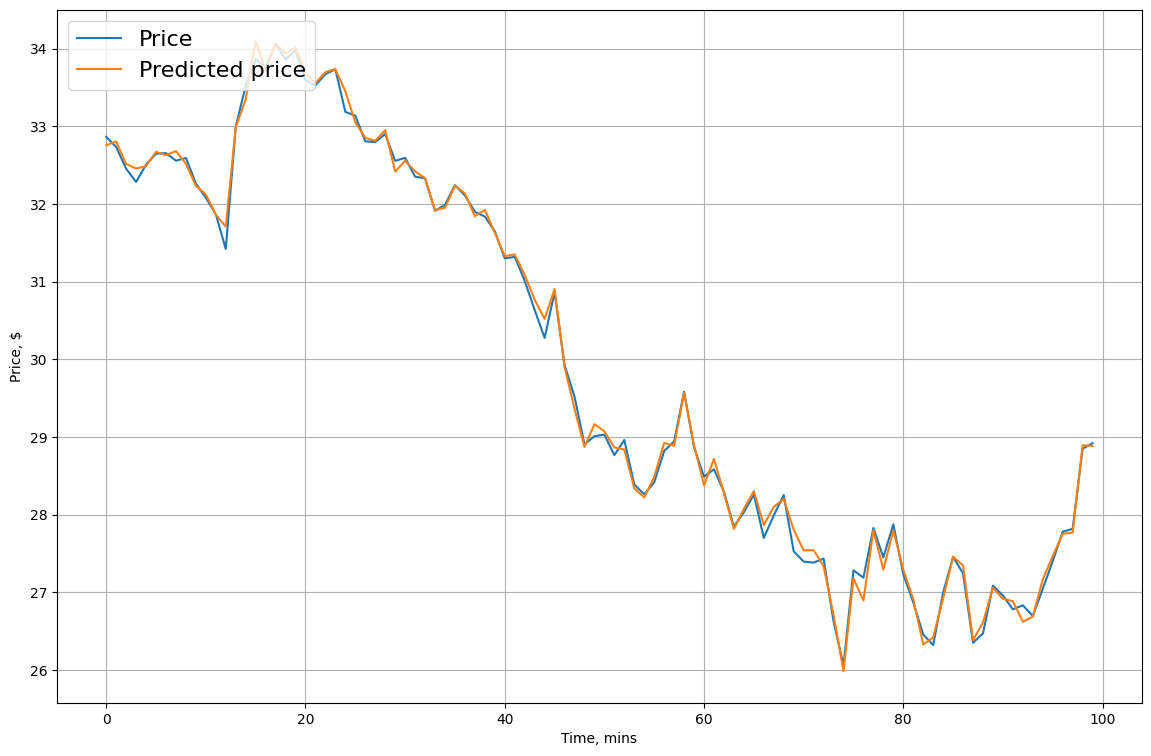

In [24]:
plt.figure(figsize=(14, 9))
plt.grid()
plt.plot(y_test.values, label="Price")
plt.plot(y_pred_test.values, label="Predicted price")

plt.xlabel("Time, mins")
plt.ylabel("Price, $")
plt.legend(loc="upper left",fontsize=16)




In [25]:
MSE = mean_squared_error(y_test, y_pred_test)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.10377164695912185


In [26]:
import gdown
import torch

In [27]:

model = LinearRegression(normalize=True).fit(X.values, y)
coef_sklearn = model.coef_.T
coef_sklearn[0] = model.intercept_
print(f'Коэффициенты рассчитанные с использованием библиотеки sklearn {coef_sklearn.T}')

Коэффициенты рассчитанные с использованием библиотеки sklearn [ 4.43017155e-03 -1.19259988e-01 -1.07687604e-01  7.94931656e-06
 -5.63013587e-06  3.62791172e-07 -4.02398815e-01  1.00035694e+00
  2.79510198e-08  2.35552124e-09]


In [28]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
import gdown
import torch

torch.save(model, 'model_scripted.pt')


In [30]:
loaded_compiled_custom_model = torch.load('model_scripted.pt')
loaded_compiled_custom_model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
model.coef_.T

array([ 4.43017155e-03, -1.19259988e-01, -1.07687604e-01,  7.94931656e-06,
       -5.63013587e-06,  3.62791172e-07, -4.02398815e-01,  1.00035694e+00,
        2.79510198e-08,  2.35552124e-09])

In [32]:
loaded_compiled_custom_model.coef_.T

array([ 4.43017155e-03, -1.19259988e-01, -1.07687604e-01,  7.94931656e-06,
       -5.63013587e-06,  3.62791172e-07, -4.02398815e-01,  1.00035694e+00,
        2.79510198e-08,  2.35552124e-09])

In [33]:
url = 'https://drive.google.com/file/d/1LEHQKTdUjh3CpoFnadZu3rW8992v3f1f/view?usp=share_link'
gdown.download(url, 'model_scripted.pt', fuzzy=True)
loaded_model  = torch.load('model_scripted.pt')

Downloading...
From: https://drive.google.com/uc?id=1LEHQKTdUjh3CpoFnadZu3rW8992v3f1f
To: /Users/rs/Documents/data-driven project2/model_scripted.pt
100%|███████████████████████████████████████| 1.28k/1.28k [00:00<00:00, 308kB/s]


In [34]:
loaded_model.coef_.T

array([ 4.43017155e-03, -1.19259988e-01, -1.07687604e-01,  7.94931656e-06,
       -5.63013587e-06,  3.62791172e-07, -4.02398815e-01,  1.00035694e+00,
        2.79510198e-08,  2.35552124e-09])